# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 200

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 200 total reviews
Scraping page 2
   ---> 400 total reviews
Scraping page 3
   ---> 600 total reviews
Scraping page 4
   ---> 800 total reviews
Scraping page 5
   ---> 1000 total reviews
Scraping page 6
   ---> 1200 total reviews
Scraping page 7
   ---> 1400 total reviews
Scraping page 8
   ---> 1600 total reviews
Scraping page 9
   ---> 1800 total reviews
Scraping page 10
   ---> 2000 total reviews


In [8]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...


Congratulations! Now you have your dataset for this task! The loops above collected 2000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
df

,reviews
0,✅ Trip Verified | Easy check in a T5. Galleri...
1,"Not Verified | Flight delayed by an hour, it ..."
2,Not Verified | The staff are very rude and not...
3,✅ Trip Verified | Good domestic flight operat...
4,Not Verified | Failed at all basic travel fund...
...,...
1995,✅ Verified Review | Flew British Airways to/f...
1996,✅ Verified Review | We frequently use British...
1997,✅ Verified Review | New York JFK to Düsseldor...
1998,"Quite simply next time we fly, and where possi..."


Removing the parts before | in the reviews column

In [11]:
df['reviews']= df['reviews'].str.split('|',expand=True)[1]

In [12]:
df

,reviews
0,Easy check in a T5. Galleries south and Nort...
1,"Flight delayed by an hour, it happens, no bi..."
2,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...
4,Failed at all basic travel fundamentals: 1) O...
...,...
1995,Flew British Airways to/from Heathrow recent...
1996,We frequently use British Airways morning fl...
1997,New York JFK to Düsseldorf via London Heathr...
1998,None


**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [13]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [14]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HPHP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HPHP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HPHP\AppData\Roaming\nltk_data...


In [15]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HPHP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HPHP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south..."
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen..."
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl..."
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera..."
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam..."


In [16]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...


In [17]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Easy check in a T5. Galleries south and Nort...,Easy check Galleries south North lounge pack...
1,"Flight delayed by an hour, it happens, no bi...",Flight delay hour happen biggie us change ga...
2,The staff are very rude and not trained prope...,staff rude train properly exception make chi...
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operate BA Cityflyer Gr...
4,Failed at all basic travel fundamentals: 1) O...,Failed basic travel fundamental flight delay...
...,...,...
1995,Flew British Airways to/from Heathrow recent...,Flew British Airways Heathrow recently first...
1996,We frequently use British Airways morning fl...,frequently use British Airways morning fligh...
1997,New York JFK to Düsseldorf via London Heathr...,New York JFK sseldorf via London Heathrow on...
1998,None,None


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [18]:
!pip install vaderSentiment

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Easy check in a T5. Galleries south and Nort...,Easy check in a T Galleries south and North l...,"[(Easy, a), (check, n), (Galleries, n), (south...",Easy check Galleries south North lounge pack...,0.9415,Positive
1,"Flight delayed by an hour, it happens, no bi...",Flight delayed by an hour it happens no biggi...,"[(Flight, n), (delayed, v), (hour, n), (happen...",Flight delay hour happen biggie us change ga...,-0.2235,Negative
2,The staff are very rude and not trained prope...,The staff are very rude and not trained prope...,"[(staff, n), (rude, a), (trained, v), (properl...",staff rude train properly exception make chi...,-0.7698,Negative
3,Good domestic flight operated by BA Cityflye...,Good domestic flight operated by BA Cityflyer...,"[(Good, a), (domestic, a), (flight, n), (opera...",Good domestic flight operate BA Cityflyer Gr...,0.9420,Positive
4,Failed at all basic travel fundamentals: 1) O...,Failed at all basic travel fundamentals Our f...,"[(Failed, v), (basic, a), (travel, n), (fundam...",Failed basic travel fundamental flight delay...,-0.9019,Negative


In [20]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    996
Negative    723
Neutral     281
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x2f38202d5e0>,
 [Text(0.006911472368401293, 1.0999782868537455, 'Positive'),
  Text(-0.47615988052220926, -0.9916006092076969, 'Negative'),
  Text(0.9945728009256178, -0.4699201460450186, 'Neutral')],
 [Text(0.003769894019127977, 0.5999881564656793, '49.8%'),
  Text(-0.2597235711939323, -0.5408730595678346, '36.1%'),
  Text(0.5424942550503369, -0.2563200796609192, '14.0%')])

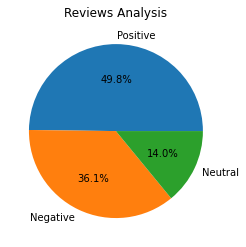

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, autopct='%1.1f%%')

In [25]:
df.to_csv("BA_reviews.csv")